# What is a relational database?

A relational database is a collection of connected tables that store and manage data efficiently while maintaining integrity and eliminating redundancy. It follows the relational model, where data is organized into tables that are linked through keys.

**Key features of a relational database**
* Each table is made up of rows (tuples) and columns (attributes).
* It prevents duplicate rows and creates relationships between tables.
* Data should be stored without repeating groups.
* Constraints are used to enforce data integrity and consistency.
* SQL is used to retrieve, insert, update, and delete data.

> **Constraints** -> Primary Key (PK), Foreign Key (FK), NOT NULL, UNIQUE, CHECK, DEFAULT.

# Database Keys

In a relational database, a **key** is a **column/attribute** or **a set of columns/attribute** that uniquely identifies each row in a table. 
* Keys ensure data integrity, prevent duplicates and create relationships between tables.
* Without keys, data can become inconsistent, duplicate records can appear, and searching for specific information becomes slow.
* Having a unique column helps, but uniqueness isn’t limited to just a single column. 
* A key can consist of one or multiple columns, ensuring each row remains distinct in the table.

# Types of database keys

## Primary key

* A primary key is a designated column (or a combination of columns) that uniquely identifies each row in a table.
* It ensures that no two rows have the same value.

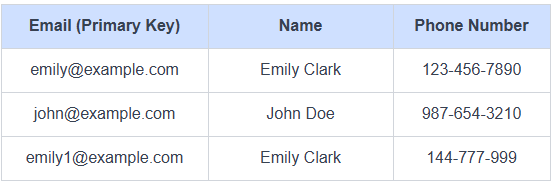

The `Email` column uniquely identifies each customer, preventing duplicate entries and ensuring efficient data retrieval.

**EXAMPLE**:

```mysql
CREATE TABLE Employees (
    EmpID   INT AUTO_INCREMENT PRIMARY KEY,
    EmpName VARCHAR(100),
    Salary  DECIMAL(10, 2)
);

-- ADD PRIMARY KEY Constraints via ALTER TABLE

ALTER TABLE Employees
ADD PRIMARY KEY (EmpID),
MODIFY EmpID INT(11) AUTO_INCREMENT;

-- AUTO_INCREMENT and PRIMARY KEY can be applied to an existing column using MODIFY as follows:
ALTER TABLE TableName
MODIFY ColumnName datatype AUTO_INCREMENT PRIMARY KEY;

ALTER TABLE Employees
MODIFY EmpID INT AUTO_INCREMENT PRIMARY KEY;

-- AUTO_INCREMENT can be removed using MODIFY as follows:
ALTER TABLE TableName
MODIFY ColumnName datatype;

-- PRIMARY KEY can be removed using DROP as follows:
ALTER TABLE TableName
DROP        PRIMARY KEY;

```

## Composite key

* A composite key consists of two or more columns that together form a unique identifier.
* A primary key can also be a composite key.

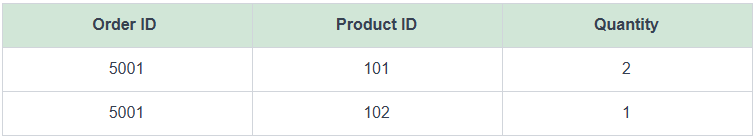

The combination of `Order ID` and `Product ID` uniquely identifies each record, preventing duplicate entries within the same order.

## Unique key

* A unique key is similar to a primary key but allows `NULL` value.
* It enforces uniqueness on specific columns.

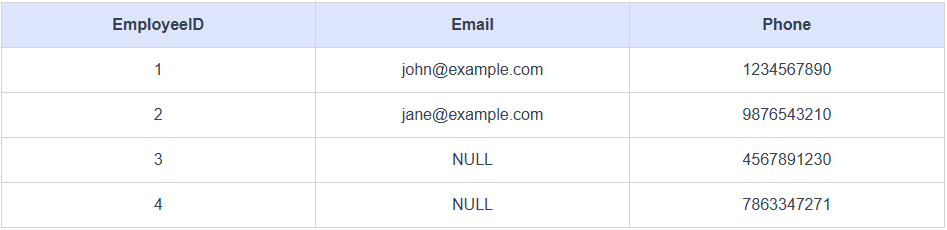

* The `Email` column has a UNIQUE constraint, meaning no two rows can have the same email.
* However, the **UNIQUE** constraint allows `NULL` values because `NULL` is considered “unknown,” and multiple `NULL`s do not violate uniqueness.

**EXAMPLE**:

```mysql
-- At the time of creating the table

CREATE TABLE Employees (
    EmpID   INT AUTO_INCREMENT PRIMARY KEY,
    EmpName VARCHAR(100),
    Salary  DECIMAL(10, 2), 
    UNIQUE  (EmpName)
);

CREATE TABLE Employees (
    EmpID   INT AUTO_INCREMENT PRIMARY KEY,
    EmpName VARCHAR(100) UNIQUE,
    Salary  DECIMAL(10, 2)
);

   
-- The UNIQUE constraint can be added using ADD as follows:

ALTER TABLE TableName
ADD UNIQUE  (ColumnName);

-- A constraint can also be given a name using CONSTRAINT as follows:

ALTER TABLE    TableName
ADD CONSTRAINT ConstraintName UNIQUE (ColumnName);

-- The UNIQUE constraint can be applied to multiple columns as well as follows:

ALTER TABLE    TableName
ADD CONSTRAINT ConstraintName UNIQUE (ColumnName1, ColumnName2);

-- The UNIQUE constraint can be removed from the column/columns using DROP INDEX as follows:
ALTER TABLE TableName
DROP INDEX  ConstraintName;

```

## Super key

A super key is any set of columns that contains the primary or composite key along with additional columns.

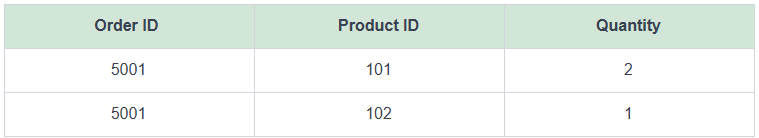

A super key can include all three columns `Order ID`, `Product` and `Quantity`.


**Possible super keys**:
* `{Student ID}` → This is the primary key (smallest unique set).
* `{Student ID, Email}` → This is still unique, but contains an extra column.
* `{Student ID, Full Name, Email}` → This is also a super key (but unnecessarily large).


## Candidate key

* A candidate key is a minimal super key—meaning it has no unnecessary attributes. 
* Among all candidate keys, one is chosen as the primary key.

**Example**:
* `Customer ID` and `Email` can both be candidate keys because they uniquely identify each customer.
* If we choose `Customer ID` as the primary key, `Email` remains a candidate key.

**Explanation**:
* `Customer ID` alone is sufficient to identify a customer, making it a candidate key.
* `Email` is also a candidate key since it uniquely identifies customers, but only one candidate key is selected as the primary key.

## Foreign Key

A foreign key in one table refers to the primary key in another table, creating a relationship between the two tables.

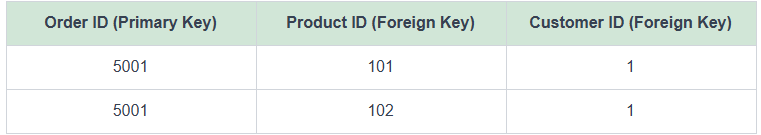

* The `Order ID` uniquely identifies each order.
* The `Customer ID `links to the Customer table, ensuring only valid customers can place orders.
* The `Product ID` links to the Product table, ensuring only valid products can be ordered.

**EXAMPLE**:

```mysql
-- At the time of creating the table

CREATE TABLE Employees (
    EmpID INT AUTO_INCREMENT PRIMARY KEY,
    EmpName VARCHAR(100),
    Salary DECIMAL(10, 2)
);

CREATE TABLE Skills (
    SkillID INT AUTO_INCREMENT PRIMARY KEY,
    EmpID INT NOT NULL,
    SkillName VARCHAR (100),
    FOREIGN KEY (EmpID) REFERENCES Employees (EmpID)
);


-- To apply FOREIGN KEY constraints via ALTER TABLE
-- 1. Apply the NOT NULL constraint
-- 2. ADD the FOREIGN KEY constraint

/* Modifying the EmpID in the Skills table to be NOT NULL */
ALTER TABLE   Skills
MODIFY COLUMN EmpID INT NOT NULL;

/* Adding the foreign key constraint on EmpID in the Skills table */
ALTER TABLE     Skills
ADD FOREIGN KEY (EmpID) REFERENCES Employees (EmpID);

-- FOREIGN KEY can be removed using the following command

ALTER TABLE TableName
DROP FOREIGN KEY ColumnName;

-- To temporarily disable a FOREIGN KEY constraint
SET FOREIGN_KEY_CHECKS = 0;

```

# What is normalization?

* **Normalization** is the process of organizing a database to reduce redundancy and improve data consistency. 
* It involves breaking large tables into smaller, related tables while maintaining data integrity.

> **Note**: By applying normalization, we break a large table into smaller tables based on functional dependencies.

# Step-by-step normalization process

Now that we understand why normalization is necessary, let’s take this Orders table as an example to explore the concept of normalization:

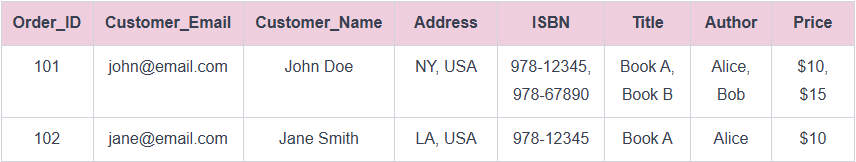

## First Normal Form (1NF)

Our original table contains repeating groups, meaning multiple values exist in a single row.

**For example**: Order 101 has two books listed but still share the same `Order_ID`, `Customer_Email`, and `Address`.

> **1NF rules**:
> * Remove repeating groups from the table.
> * Each row must be uniquely identifiable.

**Conversion to 1NF**

One way to achieve the First Normal Form is to split rows into separate entries, ensuring each piece of data is placed in a single cell.

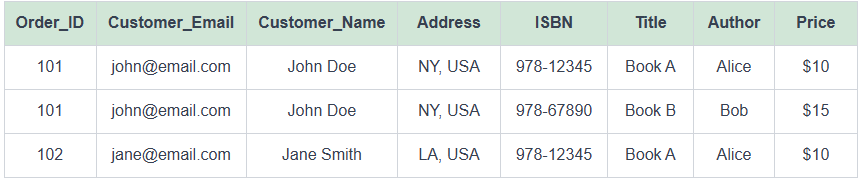

**Observations from the table**

We observe the following details from the table online bookshop:

* The `ISBN` uniquely identifies a book’s `Title`, `Author`, and `Price`.
    * `ISBN` → `Title`, `Author`, `Price`
    * **Example**: If we know `ISBN = 978-12345`, we automatically know it's `Book A` by `Alice`, `price` at `$10`.
* The `Customer_Email` uniquely determines the `Customer_Name` and `Address`.
    * `Email` → `Name`, `Address`
    * **Example**: If we know `john@email.com`, we don’t need to ask for his name and address again.

Instead of repeating the same data multiple times, we should store each piece of information only once and link them. 

This is exactly where **functional dependency** comes in.

## What is functional dependency?

A **functional dependency** exists when knowing the value of one column tells us the value of another column. 
* This means that if you know the value of one column, you can automatically determine the value of another column.
* This helps us reduce redundancy, maintain data consistency, and improve efficiency.
* Without it, databases can become inconsistent, difficult to update, and error-prone.

By applying **functional dependency**, we recognize that:
* `ISBN` → `Title`, `Author`, `Price`: If we know an `ISBN`, we automatically know the `Title`, `Author`, and `Price`. Instead of repeating book details, we can store them in a separate **Books** table.
* `Email` → `Name`, `Address`: If we know the `Email`, we automatically know the customer’s `Name` and `Address`. Instead of repeating customer details, we can store them in a separate **Customers** table.

**Without functional dependencies, databases store redundant data, making updates and searches inefficient**. 
* Now that we understand functional dependency, we see how it helps us find connections between data and remove repetition.
* But knowing these relationships isn’t enough—we need a clear method to organize our database properly. 

Let’s discuss how we can remove repetition.

## Second Normal Form (2NF)

* Even though our table follows 1NF, it still has partial dependencies. 
* A partial dependency happens when a non-key column depends on only part of a composite primary key instead of the whole key.

**Let’s think about this:** 
* Can we say that `ISBN` and `Price` depend on the book's `Title`?
* At first, it might seem reasonable, but can two books have the same `Title`?

> Look at our table. There are only two books, `Book A` and `Book B`. But in a real-world scenario, multiple books can have the same title but different authors. So, making `Title` a unique column wouldn’t work. Instead, `ISBN` is the unique identifier for a book.

* The primary key in this table is `(Order_ID, ISBN)`, as each order can have multiple books.
* Similarly, `Title`, `Author`, and `Price` depends only on `ISBN`, not on `Order_ID`.

> **2NF rules**:
> * Must meet all 1NF rules.
> * All non-key attributes must fully depend on the entire primary key, not just part of it.

## Break the table into two tables

We create separate tables for `Orders` and `Books`.

`Books` table:

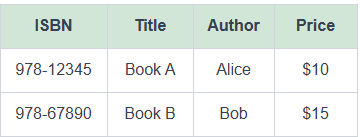

`Orders` table:

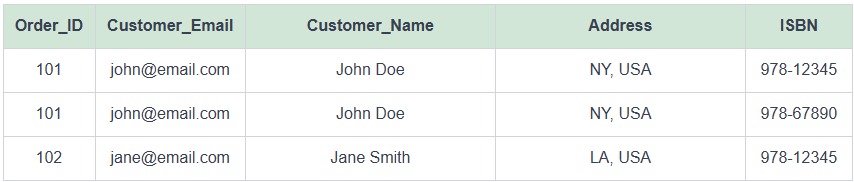

Now, every table contains data that fully depends on its respective primary key. There are no partial dependencies!

## Third Normal Form (3NF)

* A table is in 3NF if it is in 2NF and contains no transitive dependencies.
* A transitive dependency occurs when a non-key attribute depends on another non-key attribute rather than directly on the primary key.

Let’s look at the `Orders` table and notice that `Customer_Name` and  `Address` depend upon the `Customer_Email` which in itself is dependent upon the primary key. 
* Hence there is a transitive dependency.
* That is, `OrderID` → `Customer_Email` → `Customer_Name`, `Address`.

> **3NF rules**:
> * Must meet all 2NF rules.
> * No transitive dependencies (every column must depend only on the primary key).

## Fixing the transitive dependency

To remove the transitive dependency, we create a separate `Customers` table.

`Customers` table:

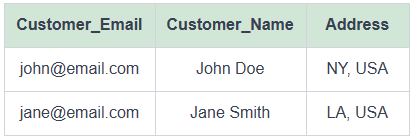

`Books` table:

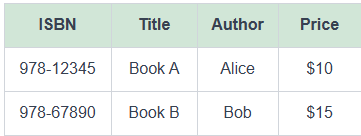

`Orders` table:

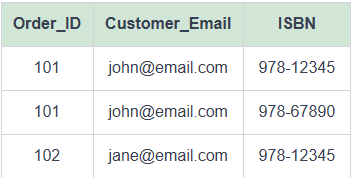


Now that we have applied normalization up to 3NF, our data is well-structured, free of redundancy, and easier to manage. 
* Each table stores only relevant information, and we have eliminated unnecessary duplication. 
* Now that our data is well-structured, **how do we ensure it stays accurate?** 
* Imagine if a customer places an order without a valid email or enters an ISBN incorrectly.

# Summary of Normalization Levels

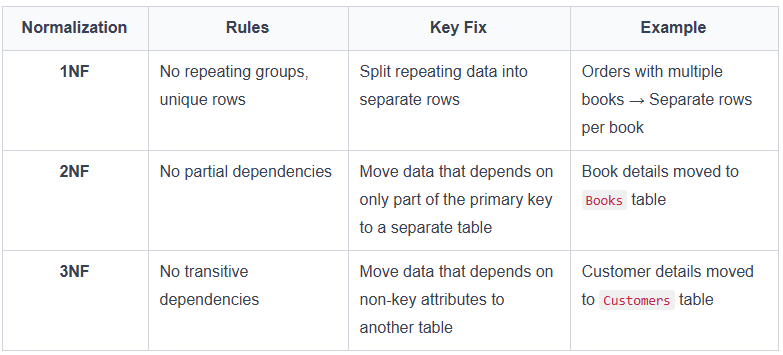

* We have structured our database with normalization principles, breaking large tables into smaller, well-organized ones. 
* But **how do you ensure the data remains accurate, reliable, and free from errors?**
* That’s where integrity rules come in.
* These rules ensure data remains valid and trustworthy

> * To prevent these errors, databases use integrity rules—entity, referential, and domain integrity..
> * These rules help maintain consistency and correctness in a database, ensuring that the relationships between tables remain valid over time.

# What is data integrity?

* Data integrity means ensuring that the data in a database remains accurate, consistent, and reliable. 
* Without integrity rules, data can become inconsistent, leading to incorrect results and faulty operations.

**Databases use constraints to enforce these integrity rules**:
* `PRIMARY KEY` → Ensures entity integrity (each record is unique).
* `FOREIGN KEY` → Ensures referential integrity (relationships are valid).
* `CHECK` → Ensures domain integrity (values follow specific rules).
* `NOT NULL` → Prevents missing essential values.
* `UNIQUE` → Ensures values are unique where duplicates are not allowed.

There are three types of integrity rules that every database follows:
1. Entity integrity
2. Referential integrity
3. Domain integrity

Let’s explore each one using our online bookstore database.

## Entity integrity

Entity integrity ensures that each record in a table can be uniquely identified. This is achieved using a primary key, which is a unique identifier for each row.

**Entity integrity rules**:
* Every table must have a primary key.
* The primary key must be unique and not null.

**Example**: `Books` table

Here, `ISBN` is the primary key:
* Each `ISBN` must be unique.
* `ISBN` cannot be `NULL` (empty).

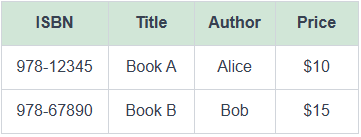

Without entity integrity, duplicate or missing `ISBN` could confuse. For example, if two books had the same `ISBN`, we wouldn’t know which one belongs to which book!

## Referential integrity

Referential integrity ensures that relationships between tables remain valid. This means that a record in one table cannot reference a non-existent record in another table. We use foreign keys to enforce this.

**Referential integrity rules**:
* A foreign key in one table must always reference a primary key in another table.
* Deleting a record from the referenced table `Books` should be restricted if related records exist in another table `Orders`.

**Example**: `Books` and `Orders` tables

`Books` table (referenced table)

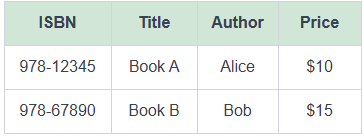

`Orders` table (referencing table)

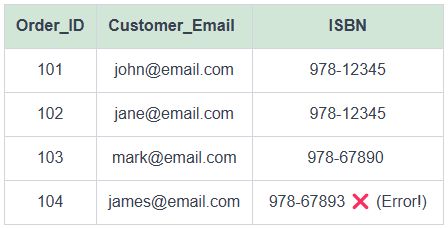

Here, `ISBN` in the `Orders` table is a foreign key referencing the `Books` table. 
* But there is a problem: `978-67893` does not exist in the `Books` table.
* This violates referential integrity, because an order cannot be linked to a non-existent book.

> **Note**: Without referential integrity, you could have orders from customers that don’t exist, causing errors in tracking and processing orders

## Domain integrity

Domain integrity ensures that values entered in a table follow predefined rules, such as valid data types, allowed formats, and specific ranges.

**Domain integrity rules**:
* Each column should have a data type and constraints.
* Values should follow predefined rules (e.g., positive numbers, valid email format, etc.).

**Example**: `Books` table

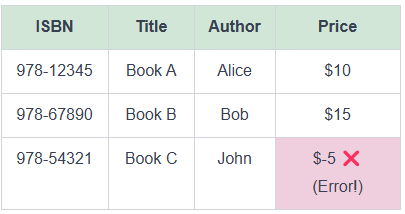

Here, the `Price` column should never have a negative value. This is a domain integrity violation.

**Examples of domain integrity rules**:
1. `Price` must always be a positive number.
2. `Age` should be a reasonable value (e.g., between 0 and 150).
3. `Salary` cannot be negative.

**Defining domain rules**

To enforce domain integrity, we define constraints when creating a table. For example:

```sql
CREATE TABLE books (
    isbn VARCHAR(20) PRIMARY KEY,
    title VARCHAR(255),
    author VARCHAR(255),
    price DECIMAL(5,2) CHECK (price > 0) -- Ensures price is always positive
);
```

This `CHECK` constraint ensures that a negative price cannot be inserted into the table.

For cases like date of birth, reasonable year ranges depend on the context. If we want to allow people only over 18 to register, we could set a constraint like:

```sql
CHECK (year_of_birth >= 1900 AND year_of_birth <= YEAR(CURDATE()) - 18)
```

This ensures no unrealistic dates (e.g., 1800) and applies an age restriction.

# Integrity Rules and Constraints

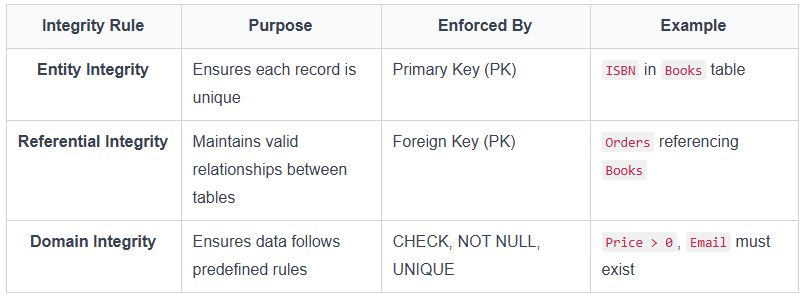

We’ve seen how integrity rules keep our data accurate and reliable. 

**But how do we design a database that naturally enforces these rules from the start?**

This is where the **entity-relationship (ER) model** comes in! 
* Think of it as the blueprint of your database—defining entities, their attributes, and how they connect.
* **How do we decide which tables to create?**
* **What relationships should we define?**

In the next lesson, we’ll dive into ER modeling, using real-world scenarios to map out a structured, efficient database from scratch!